# PROJET 03: Concevez une application au service de la santé publique

- L'objectif de ce projet est de **concevoir une application au service de la santé publique**.





 Nous devons utiliser la base de données OpenFoodFacts pour trouver des idées innovantes d’applications en lien avec l'alimentation.




OpenFoodFacts (https://world.openfoodfacts.org/) est une base de données citoyenne qui récupère des informations sur les produits de notre alimentation. Cette base de données contient différents champs sur :

- les informations générales du produit
  - un ensemble de tags
  - des informations diverses
  - les ingrédients du produit
  - les informations nutritionnelles du produit
  
  







  
- Ces données sont disponibles sur https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv






## Idée d'application

L'idée d'application, avec test de faisabilité, portera sur une aide aux personnes atteintes de **L’homocystinurie**.



- **L'homocystinurie** (déficit en cystathione bêtasynthase) est une maladie génétique rare, grave, évolutive, associée à un risque de morbidité et de mortalité élevé. Elle est caractérisée par un retard mental, des atteintes oculaires (subluxation du cristallin, cataracte, etc.), squelettiques, psychiatriques, et par un risque majeur d'accidents vasculaires thromboemboliques artériels ou veineux.

En effet ces personnes doivent suivre un régime hypoprotidique très strict et quotidien tout en suivant une alimentation saine et équilibrée

L'application sera un moteur de recommandation : à partir de la recherche d'un produit, la liste des produits les plus sains, classés par le nombre de g de protéines le plus faible possible sera proposée, après interrogation de la base de données d'Open Food Facts.

**Mission**

- Nettoyage des données :

- lire les définitions des variables,

- filtrer le jeu de données,

- traiter les valeurs aberrantes,

- traiter les valeurs manquantes.


## Chargement des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import decomposition, preprocessing
from wordcloud import WordCloud, STOPWORDS
import math
import pickle


%matplotlib inline

## Chargement des données


In [3]:

#importation de la donnée
data= pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter="\t")
data.head()

C:\Users\karim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ## Description du jeu de données

In [4]:
data.shape

(320772, 162)

In [5]:
data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

les valeurs manquantes dans ce jeu donnees 

In [6]:
#Fonction pourcentatge de valeurs manquantes
def percent_missed_values(data):
    somme = 0
    for f in list(data.columns):
        somme += data[f].isna().sum()
    pourc_nan = round((somme / (data.shape[0]*data.shape[1]))*100, 2)
    return pourc_nan

print(f'Valeurs manquantes :{percent_missed_values(data)} %')

Valeurs manquantes :76.22 %


- **Visiulisation des valeurs manquantes** 

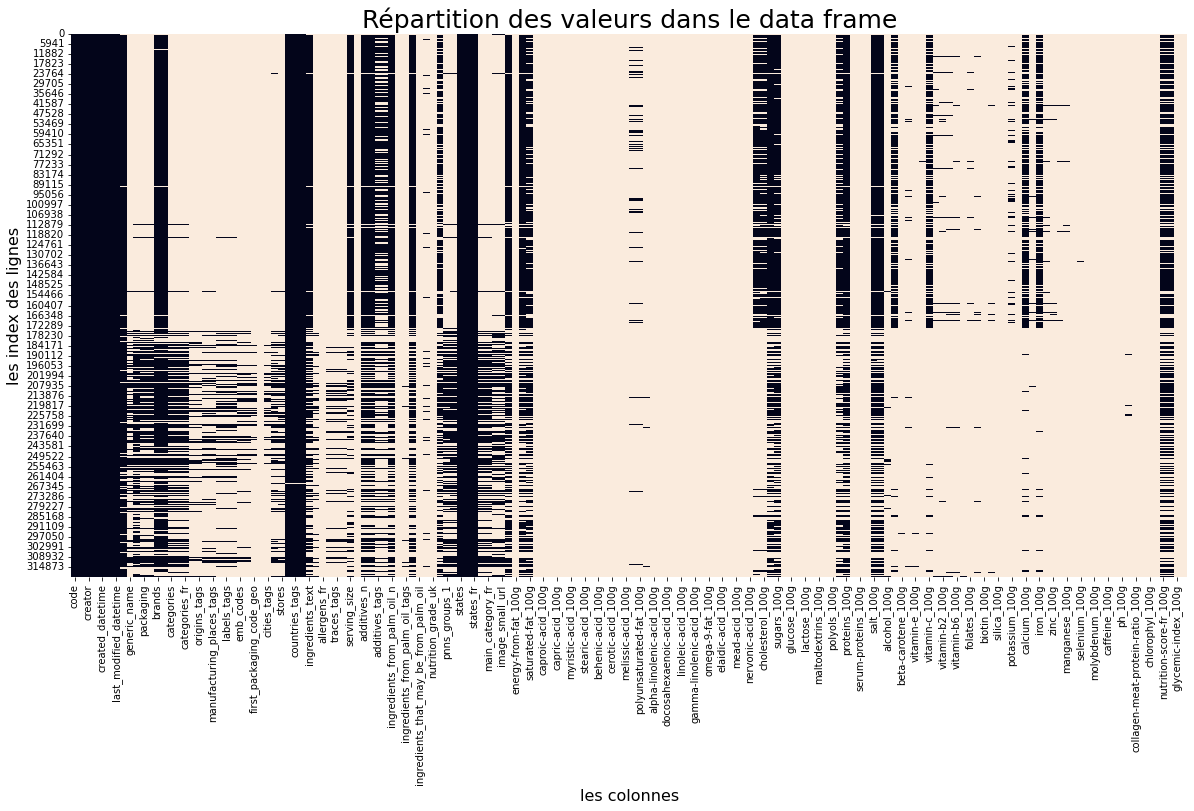

<Figure size 432x288 with 0 Axes>

In [7]:
# les valeurs manquantes dans le DF 'data'
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.title('Répartition des valeurs dans le data frame',size=25)
plt.xlabel("les colonnes", size=16)
plt.xticks(rotation=90)
plt.ylabel("les index des lignes",size=16)
plt.show()
plt.savefig('Répartition des valeurs dans le data frame')

- **Visialusation de pourcentage des valeurs manquantes** 

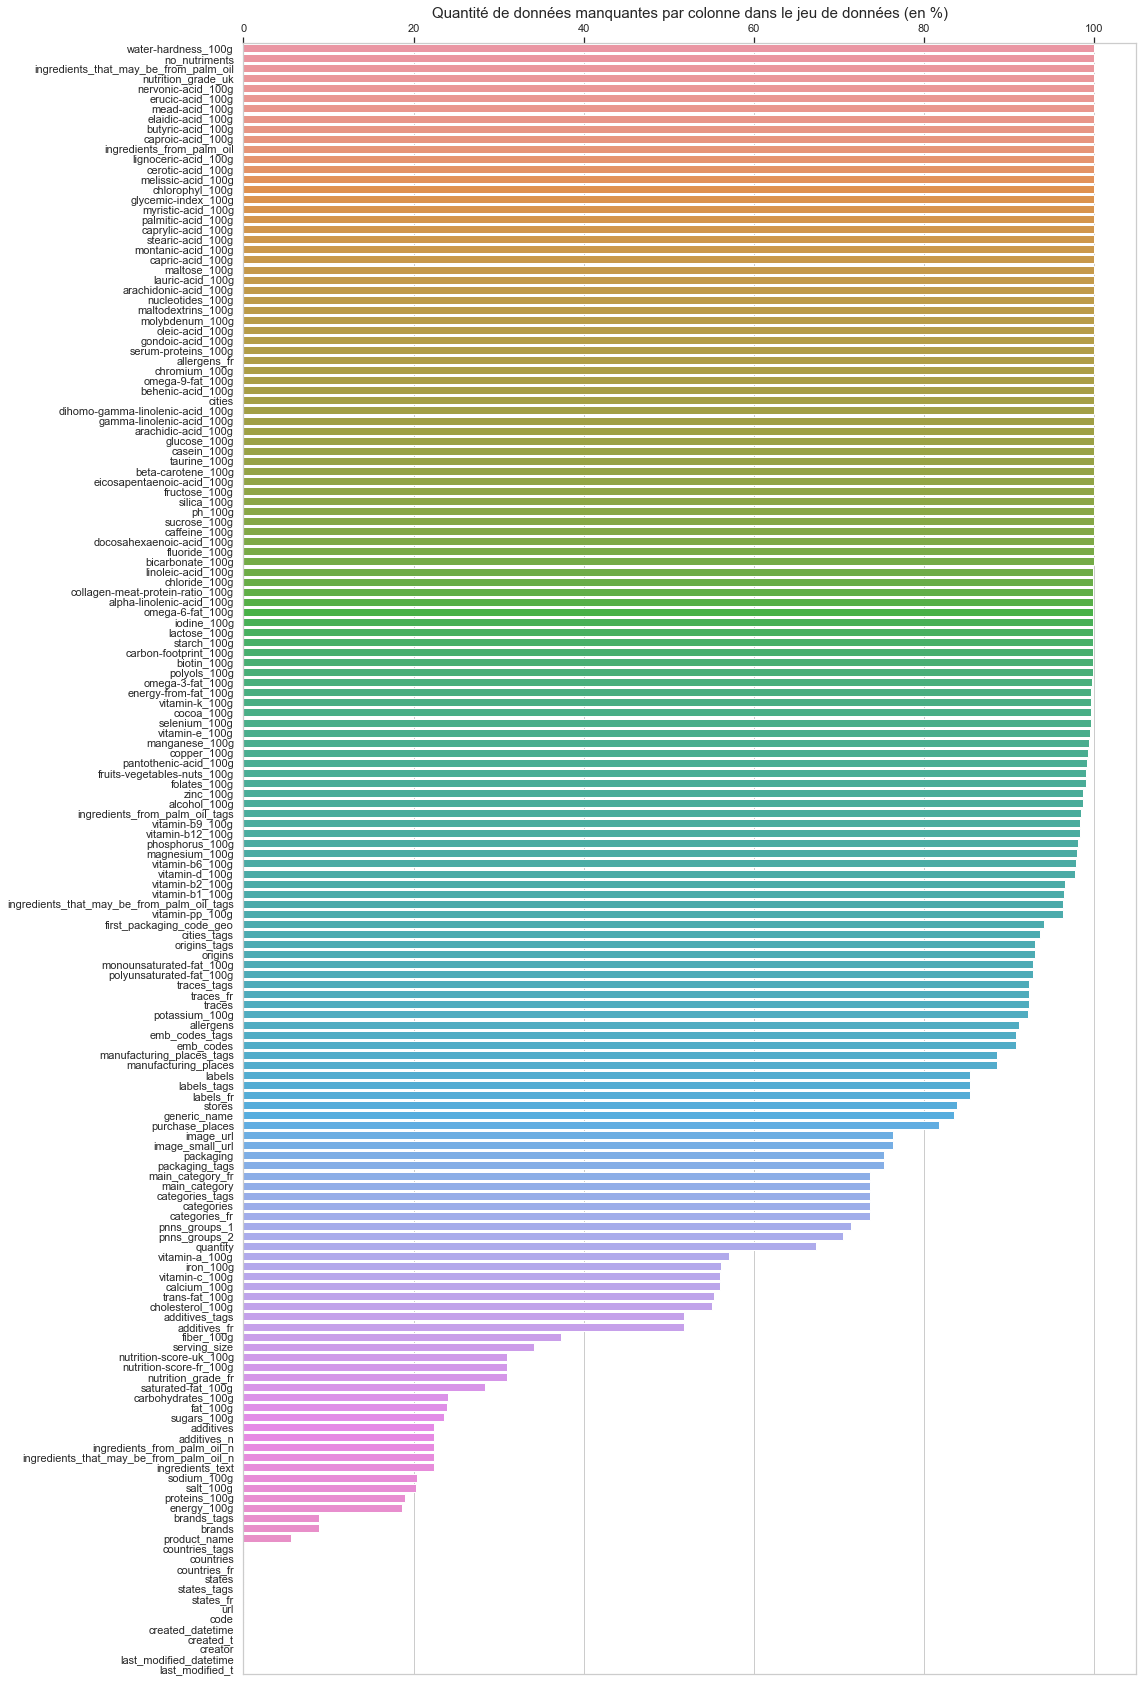

In [8]:
proportion_nan = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

### la description des variables 

In [9]:
# Une fonction qui retourne la description des variables qualitatives/quantitatives
def desc_var(df, type_var='all'):
    df_taille = df.shape[0]
    if type_var == 'num':
        desc_var = df.describe()
    elif type_var == 'cat':
        desc_var = df.describe(exclude=[np.number])
    else:
        desc_var = df.describe(include='all')

    desc_type = pd.DataFrame(desc_var.dtypes, columns=['type']).T
    nb_nan = df_taille - desc_var.loc['count'].T
    pourcentage_nan = nb_nan * 100 / df_taille
    desc_nan = pd.DataFrame([nb_nan, pourcentage_nan],
                            index=['nb_nan', '%_nan'])
    desc_var = pd.concat([desc_type, desc_nan, desc_var])

    return desc_var

In [10]:
# Résumé des variables qualitatives
desc_cat = desc_var(data, 'cat')
desc_cat

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
type,int64,object,object,int64,object,int64,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object
nb_nan,23.0,23.0,2.0,3.0,9.0,0.0,0.0,17762.0,267977.0,215953.0,...,99562.0,229259.0,226281.0,46.0,46.0,46.0,236406.0,236406.0,244936.0,244936.0
%_nan,0.00717,0.00717,0.000623,0.000935,0.002806,0.0,0.0,5.537266,83.541269,67.322896,...,31.038245,71.471014,70.542628,0.01434,0.01434,0.01434,73.699076,73.699076,76.358286,76.358286
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,...,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836
unique,320638,320749,3535,189636,189568,180639,180495,221347,38584,13826,...,5,14,42,1021,1021,1021,3543,3543,75836,75836
top,24463061071,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489077120,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:beverages,Boissons,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...
freq,2,1,169868,20,20,33,33,410,201,4669,...,62763,22624,22624,168905,168905,168905,6054,6054,1,1


**Remarque**:
La variable 'code' est l'identifiant unique pour chacun des produit,4 doublons pour cette variable qui devrait être unique.

In [11]:
# Résumé des variables quantitatives
desc_num =desc_var(data, 'num')
desc_num

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nb_nan,320772.0,71833.0,71833.0,320772.0,71833.0,320772.0,320772.0,59659.0,319915.0,76881.0,...,320723.0,317736.0,320607.0,319824.0,320772.0,320504.0,99562.0,99562.0,320772.0,320772.0
%_nan,100.0,22.393787,22.393787,100.0,22.393787,100.0,100.0,18.598568,99.732832,23.967491,...,99.984724,99.053533,99.948562,99.704463,100.0,99.916452,31.038245,31.038245,100.0,100.0
count,0.0,248939.0,248939.0,0.0,248939.0,0.0,0.0,261113.0,857.0,243891.0,...,49.0,3036.0,165.0,948.0,0.0,268.0,221210.0,221210.0,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1141.914605,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6447.154093,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,8.0,6.0,NaN,0.0,-15.0,-15.0,NaN,NaN
25%,NaN,0.0,0.0,NaN,0.0,NaN,NaN,377.0,49.4,0.0,...,6.3,0.0,12.0,32.0,NaN,98.75,1.0,1.0,NaN,NaN
50%,NaN,1.0,0.0,NaN,0.0,NaN,NaN,1100.0,300.0,5.0,...,7.2,23.0,15.0,50.0,NaN,195.75,10.0,9.0,NaN,NaN
75%,NaN,3.0,0.0,NaN,0.0,NaN,NaN,1674.0,898.0,20.0,...,7.4,51.0,15.0,64.25,NaN,383.2,16.0,16.0,NaN,NaN


**Remarque**: 
- certaines valeurs pour les variables '_100g' contiennent plus que 100g.
- des variables contiennent des valeurs négatives.

## Nettoyage du jeu de données

### Les produits vendu en france 

L'idée d'application s'agit d'une recommandation des produits hypoprotidiques en France ==> on ne conserve que les produits qui sont vendus en France.

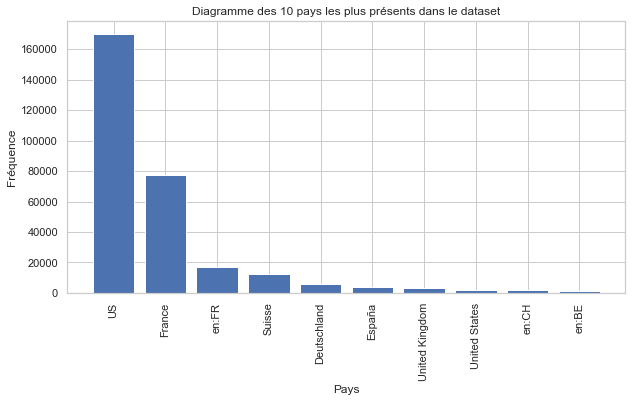

In [12]:
# on affiche le nombre de produit par pays
df_countries = data["countries"].value_counts()
df_countries = df_countries.where(df_countries>1).dropna()

# Création  diagramme des pays les plus représenté
plt.figure(figsize=(10,5))
plt.bar(df_countries.index[:10], df_countries.tolist()[:10])
plt.xlabel('Pays')
plt.ylabel('Fréquence')
plt.title('Diagramme des 10 pays les plus présents dans le dataset')
plt.xticks(rotation=90)
plt.show()



In [13]:
print('Nombre de lignes dans data sans filtre : {}'.format(len(data)))
print('Nombre de lignes dans data avec filtre \'France\' sur \'countries\' : {}'.format(len(data[data['countries'].str.contains('France', na=False)])))
print('Nombre de lignes dans data avec filtre \'France\' sur \'countries\' : {}'.format(len(data[data['countries'].str.contains('France', case=False, na=False)])))
print('Nombre de lignes dans data avec filtre \'France\' sur \'countries\' OU \'countries_fr\' : {}'.format(len(data[(data['countries'].str.contains('France', case=False, na=False) | (data['countries_fr'].str.contains('France', case=False, na=False)))])))
print('Nombre de lignes dans data avec filtre \'fr\' sur \'countries\' : {}'.format(len(data[data['countries'].str.contains('fr', case=False, na=False)])))
print('Nombre de lignes dans data avec filtre \'France\' sur \'purchase_places\' : {}'.format(len(data[data['purchase_places'].str.contains('France', na=False)])))
print('Nombre de lignes dans data avec filtre \'France\' sur \'countries_tags\' : {}'.format(len(data[data['countries_tags'].str.contains('en:france', na=False)])))
print('Nombre de lignes dans data avec filtre \'France\' sur \'countries_fr\' : {}'.format(len(data[data['countries_fr'].str.contains('france', case=False, na=False)])))
print('Nombre de lignes dans data avec filtre \'France\' sur \'countries_tags\' : {}'.format(len(data[data['countries_tags'].str.contains('france', case=False, na=False)])))
print('Nombre de lignes dans data avec filtre \'France\' sur \'ingredients_text\' : {}'.format(len(data[data['ingredients_text'].str.contains('France', na=False)])))

Nombre de lignes dans data sans filtre : 320772
Nombre de lignes dans data avec filtre 'France' sur 'countries' : 80283
Nombre de lignes dans data avec filtre 'France' sur 'countries' : 80865
Nombre de lignes dans data avec filtre 'France' sur 'countries' OU 'countries_fr' : 98440
Nombre de lignes dans data avec filtre 'fr' sur 'countries' : 98468
Nombre de lignes dans data avec filtre 'France' sur 'purchase_places' : 38179
Nombre de lignes dans data avec filtre 'France' sur 'countries_tags' : 98439
Nombre de lignes dans data avec filtre 'France' sur 'countries_fr' : 98440
Nombre de lignes dans data avec filtre 'France' sur 'countries_tags' : 98440
Nombre de lignes dans data avec filtre 'France' sur 'ingredients_text' : 1041


In [14]:
#  Filtrage des produits vendu en France uniquement
data_fr = data[data['countries_tags'].str.contains('en:france', case=False, na=False)]
data_fr.shape

(98439, 162)

In [15]:
# Suppression les colonnes vides du dataframe
data_fr=data_fr.dropna(axis=1, how='all')
nb_row, nb_col = data_fr.shape
print(f'Le jeu de données contient {nb_row} lignes et {nb_col} colonnes.')

Le jeu de données contient 98439 lignes et 136 colonnes.


### supprimer les méta-données

In [16]:
#supprimer les méta-données
data_fr.drop(['created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime'], axis=1, inplace=True)

### supprimer les Doublon

In [17]:
#supprimer les Doublon
# Doublons pour la variable 'Code'
doublons_code = data_fr[data_fr.duplicated(['code'], keep=False)]
nb_doublons_code = doublons_code.shape[0]
print( f'Nombre de doublons sur le code produit : {int(nb_doublons_code/2)}')
data_fr.drop_duplicates(subset='code', keep='last', inplace=True)
data_fr.shape

Nombre de doublons sur le code produit : 4


(98435, 132)

### Filtre des données pertinentes pour notre application
Les personnes atteintes de HUC doivent suite un régime alimentaire pauvre en protéines en suivant une alimentation saine et équilibrée, avec des produits peu transformés (ils contiennent de l'aspartame qui augmente le taux de phénylalanine et intoxique la personne).

- Les données utiles pour nos informations sont : 

les nutriments répondants à une alimentation saine : **nutriscore**

et équilibrée :

macro-nutriments **(protéines (nutriment principal pour notre étude), lipides, glucides)**

micro-nutriments **(vitamines et minéraux)**

la disponibilité des produits en **France**

**les noms des produits, catégories,marque, photos** permettant de reconnaître le produit recommandé par le moteur de recommandation de notre application.

### Informations génerals 

**Nom des produits**

- **Comparaison product_name/generic_name**

In [18]:
df_product = data_fr[data_fr['generic_name'] != data_fr['product_name']]
df_product = df_product[['generic_name', 'product_name']
                        ][df_product['generic_name'].notnull()]

df_product.head()


,generic_name,product_name
184,Biscuits sablés déclassés fourrage au cacao,Biscuits sablés fourrage au cacao
187,Bonbons acidulés Raisin Fraise,NaN
226,Boisson gazeuse rafraîchissante aux extraits n...,"Pepsi, Nouveau goût !"
240,Boisson gazeuse aux extraits naturels de citro...,7Up
279,Pâtisseries aux raisins secs.,Cakes Raisins


In [19]:
print('taux de remplissage par colonne')
tx_remplissage=100*(len(df_product)-df_product.isnull().sum())/len(df_product)
print(tx_remplissage)

taux de remplissage par colonne
generic_name    100.000000
product_name     99.855323
dtype: float64


**Remarque**: On garde la variable **"product_name"**

Le nom du produit est primordial puisque l'application recherchera les produits les moins protéinés. ==> suppression des produits sans nom

In [20]:
#Suppression des produits sans nom de produit renseigné ('product_name' vide)
data_fr[data_fr['product_name'].isnull()]
print('On supprime les {} produits sans nom renseigné'.format(len(data[data['product_name'].isnull()])))
data_fr= data_fr[data_fr['product_name'].notnull()]

On supprime les 17762 produits sans nom renseigné


#### Comparaison pnns_groups_1/pnns_groups_2 :

In [21]:
df_pnns = data_fr[data_fr['pnns_groups_1'] != data_fr['pnns_groups_2']]
df_pnns  = df_pnns[['pnns_groups_1','pnns_groups_2']]
df_pnns =df_pnns.dropna().head(20)
df_pnns.style.hide_index()

pnns_groups_1,pnns_groups_2
Cereals and potatoes,Legumes
Sugary snacks,Biscuits and cakes
Beverages,Non-sugared beverages
Beverages,Sweetened beverages
Beverages,Sweetened beverages
Sugary snacks,Biscuits and cakes
Sugary snacks,Biscuits and cakes
Sugary snacks,Biscuits and cakes
Fish Meat Eggs,Meat
Sugary snacks,Biscuits and cakes


**Remarque** : pnns_groups_1 représente un groupe de produits et pnns_groups_2 est un sous groupe de ce premier groupe.

**Conclusion** :on conserve les 2 variables. 

#### Comparaison brands/brands_tags :

In [22]:
df_marque = data_fr[data_fr['brands'] != data_fr['brands_tags']]
df_marque = df_marque[['brands', 'brands_tags']][df_marque['brands'].notnull()].head(15)
df_marque.style.hide_index()

brands,brands_tags
Ferme t'y R'nao,ferme-t-y-r-nao
Sunridge,sunridge
"Twix, Lundberg","twix,lundberg"
Bertrand Lejeune,bertrand-lejeune
St Michel,st-michel
Alice Délice,alice-delice
Alice Délice,alice-delice
Alice Délice,alice-delice
Alice Délice,alice-delice
M&m's,m-m-s


Les variables ont le même taux de remplissage. Le nom de la marque est plus littéraire dans la variable 'brands'.

**Conclusion** : on conserve la variable 'brands'.

**Variables retenues :**

- code : identifiant unique du produit.
- image_url : photographie du produit permet de le reconnaître.
- product_name : nom du produit, indispensable : utilisé pour effectuer la recherche de notre application.
- pnns_groups_1 : groupe de classement (pourra permettre de rechercher les produits par groupe de produits dans une deuxième - phase de prototype).
- pnns_groups_2 : sous-groupe de classement du produit (permet de savoir si le produit est autorisé, interdit ou à contrôler).
- brands : marque (permet à l'utilisateur de retrouver le produit).
- main_category_fr: categorie alimentaire 

In [23]:
cols_inf_gen = ['code', 'image_url', 'product_name', 'pnns_groups_1','pnns_groups_2','main_category_fr','brands']

### Alimentation équilibrée : nutriments, vitamines, minéraux

In [24]:
nutriments = data_fr.columns[data_fr.columns.str.endswith('_100g')]
nutriments = nutriments.to_list()
nutriments

['energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'lauric-acid_100g',
 'arachidic-acid_100g',
 'montanic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'sucrose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'maltose_100g',
 'maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vi

#### Comparaison nutrition_score_fr_100g /nutrition_score_uk_100g /nutrition_grade_fr:

In [25]:
data_fr['nutrition-score-fr_100g'].equals(data_fr['nutrition-score-uk_100g'])

False

In [26]:

nutri_score=data_fr.loc[:,['nutrition-score-fr_100g','nutrition-score-uk_100g','nutrition_grade_fr']]
nutri_score.dropna().head()

,nutrition-score-fr_100g,nutrition-score-uk_100g,nutrition_grade_fr
106,22.0,22.0,e
190,14.0,14.0,d
191,14.0,14.0,d
226,13.0,2.0,e
234,15.0,15.0,d


**Conclusion**: On garde ' nutrition_grade_fr' : le grade nutritionnel adapté pour le marché français 

In [27]:
# Suppression de la variable nutrition_score_uk_100g 
nutriments.remove('nutrition-score-uk_100g')



#### Comparaison additives_n/additives/additives_tags/additives_fr 

In [28]:
df_additive= data_fr.loc[:,['additives_n','additives','additives_tags','additives_fr']]
df_additive.dropna().head()

,additives_n,additives,additives_tags,additives_fr
106,1.0,[ milk-chocolate-coating -> en:milk-chocolate...,en:e322,E322 - Lécithines
184,3.0,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,"en:e1400,en:e322,en:e503","E1400 - Dextrines,E322 - Lécithines,E503 - Car..."
189,4.0,[ sirop-saveur-pistache-5-cl -> fr:sirop-save...,"en:e330,en:e171,en:e211,en:e131","E330 - Acide citrique,E171 - Oxyde de titane,E..."
226,2.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"en:e150d,en:e338","E150d - Caramel au sulfite d'ammonium,E338 - A..."
240,3.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"en:e330,en:e296,en:e331","E330 - Acide citrique,E296 - Acide malique,E33..."


**Conclusion**: on conserve la variable 'additives_n' qui indique le nembre des additives ajoutés 

#### Comparaison concernant l'huile de palme

In [29]:
df_palm_oil=data_fr.loc[:,['ingredients_from_palm_oil_n','ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_tags']]
df_palm_oil.dropna().head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags
1356,1.0,huile-de-palme,1.0,e471-mono-et-diglycerides-d-acides-gras-alimen...
22521,1.0,huile-de-palme,2.0,e471-mono-et-diglycerides-d-acides-gras-alimen...
58756,1.0,huile-de-palme,1.0,e471-mono-et-diglycerides-d-acides-gras-alimen...
66153,1.0,huile-de-palme,2.0,e472c-ester-diacetyl-citrique-de-mono-et-digly...
79539,1.0,huile-de-palme,1.0,e471-mono-et-diglycerides-d-acides-gras-alimen...


**Remarque**: On garde les deux colonnes suivantes'ingredients_from_palm_oil_n'et'ingredients_that_may_be_from_palm_oil_n'

In [30]:
cols_garde = ['additives_n', 'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr']

In [31]:
# création de dataframe 
df_appli=data_fr[cols_inf_gen+cols_garde+nutriments]
df_appli.shape

(91242, 89)

- **pourcentage de valeurs manquantes**

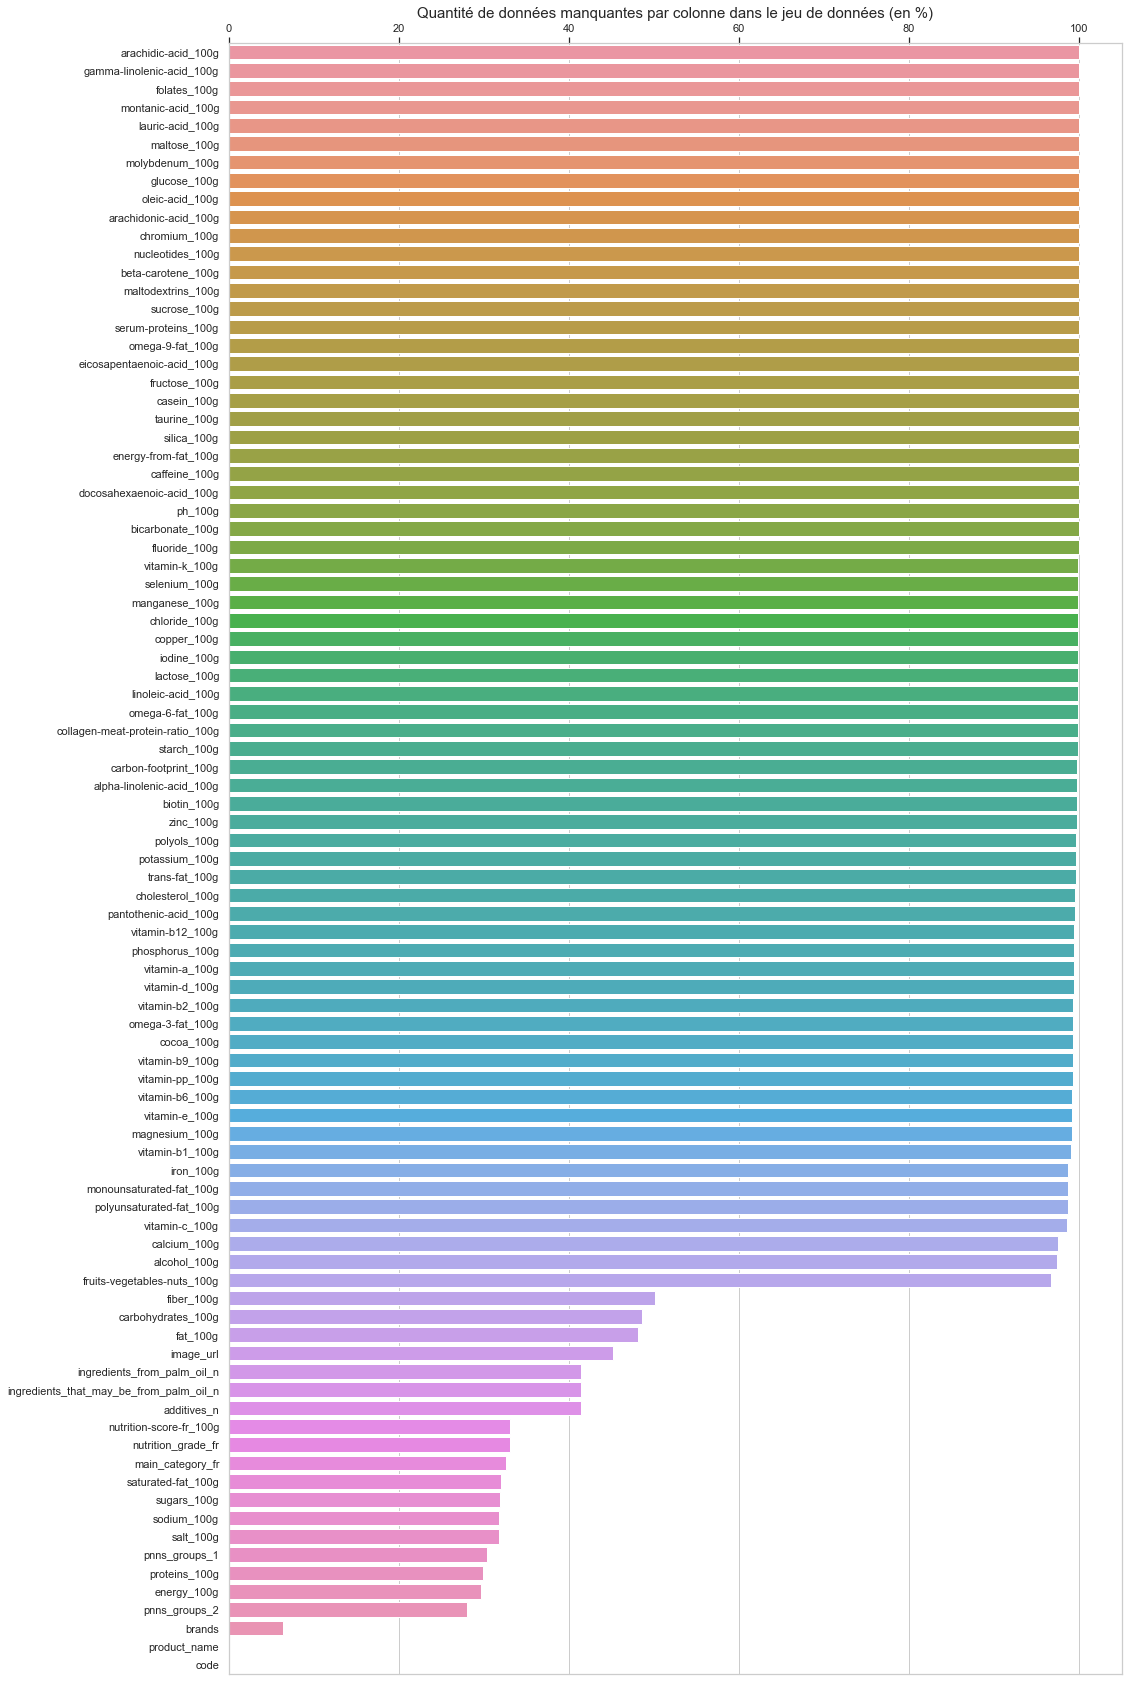

In [32]:
proportion_nan = df_appli.isna().sum().divide(df_appli.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

In [33]:
# Nombre de variables par plage de pourcentage de valeurs manquantes

liste_bins=[]
if len(liste_bins) == 0:
    liste_bins = [0, 25, 40, 60, 80]
liste_bins.append(100)
nb_lignes =df_appli.shape[0]
sum_nan = df_appli.isna().sum()
df_nan = pd.DataFrame({'Variable': sum_nan.index,
                           'nb_nan': sum_nan.values})
df_nan['%_nan'] = [(row * 100) / nb_lignes for row in df_nan['nb_nan']]
df_nan['%_nan_groupe'] = pd.cut(df_nan['%_nan'], bins=liste_bins)
s_gpe_nan = df_nan['%_nan_groupe'].value_counts().sort_index()
df_group_nan = pd.DataFrame({'Plage de %': s_gpe_nan.index,
                              'nb_variable': s_gpe_nan.values})
df_group_nan


,Plage de %,nb_variable
0,"(0, 25]",1
1,"(25, 40]",11
2,"(40, 60]",7
3,"(60, 80]",0
4,"(80, 100]",68


- 68 variables avec plus de 60% de valeurs manquantes.
- 19 variables avec moins de 60% de valeurs manquantes.

**Conclusion** : On supprime des variables très peu renseignées (plus de 60% de valeurs manquantes)       

####   Suppression des variables très peu renseignées

In [34]:
#Supprime les variables à partir d'un seuil en % de nan.
#seuil : on conserve toutes les variables dont taux de nan <60%
                        
df_appli_nan = round((df_appli.isna().sum() / df_appli.shape[0]) * 100, 2)
cols = df_appli.columns.tolist()
 # Conservation seulement des variables avec valeurs manquantes >= 60%
cols_a_garder = df_appli_nan[df_appli_nan.values < 60].index.tolist()
cols_info_gen_supprimees = [col for col in cols if col not in cols_a_garder]
df_appli = df_appli[cols_a_garder]
print(f'Liste des variables éliminées :\n{cols_info_gen_supprimees}\n')
print('-.'*40)
print(f'Liste des variables conservées :\n{cols_a_garder}')


Liste des variables éliminées :
['energy-from-fat_100g', 'lauric-acid_100g', 'arachidic-acid_100g', 'montanic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g

### Les variables que nous utiliserons

**Les variables quantitatives**

- Discrète :'nutriscore_score'
- Continues :'code','energy_100g','fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','potassium_100g','glycemic-index_100g'.

**Les variables qualitatives**

- Nominales: 'pnns_groups_1' ,'pnns_groups_2'.'brands',
- Ordinales:'nutrition_grade_fr'

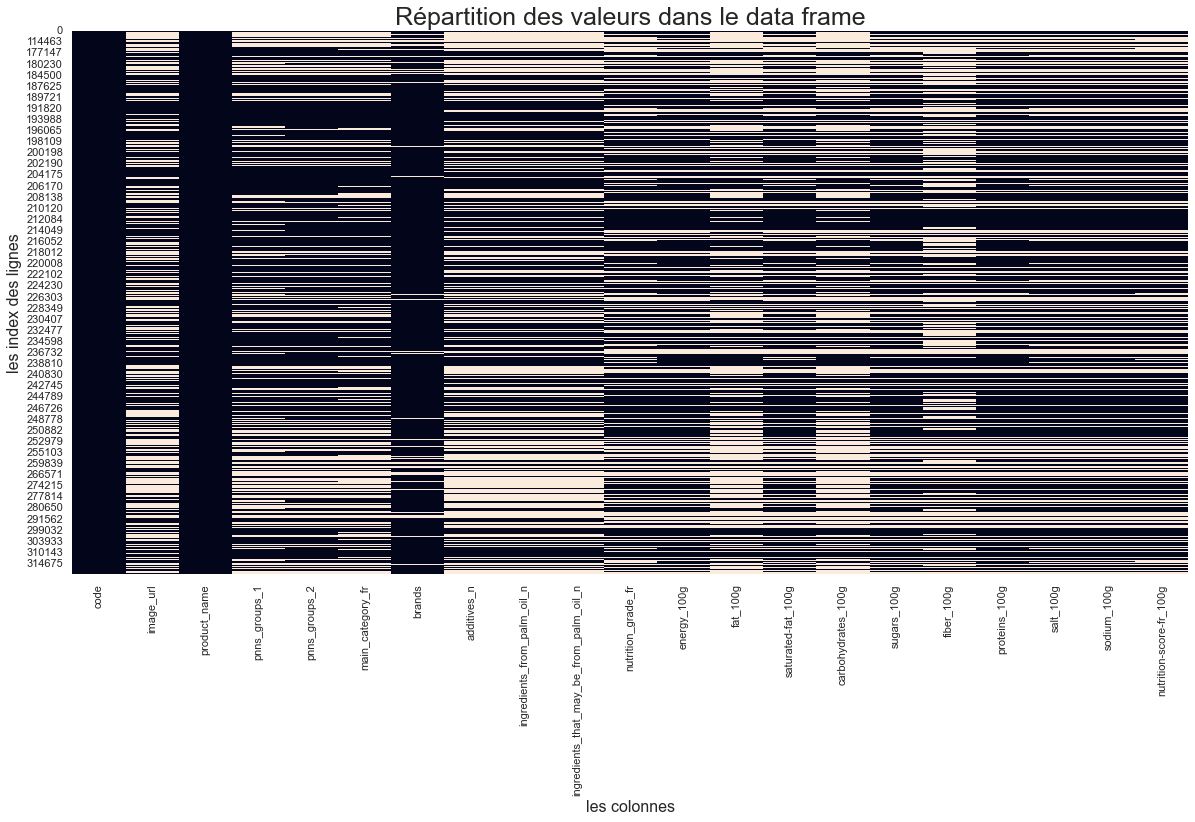

<Figure size 432x288 with 0 Axes>

In [35]:
# les valeurs manquantes dans le DF 'data'
plt.figure(figsize=(20,10))
sns.heatmap(df_appli.isna(), cbar=False)
plt.title('Répartition des valeurs dans le data frame',size=25)
plt.xlabel("les colonnes", size=16)
plt.xticks(rotation=90)
plt.ylabel("les index des lignes",size=16)
plt.show()
plt.savefig('Répartition des valeurs dans le data frame')

In [36]:
df_appli.dtypes

code                                        object
image_url                                   object
product_name                                object
pnns_groups_1                               object
pnns_groups_2                               object
main_category_fr                            object
brands                                      object
additives_n                                float64
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
carbohydrates_100g                         float64
sugars_100g                                float64
fiber_100g                                 float64
proteins_100g                              float64
salt_100g                                  float64
sodium_100g                    

### Valeurs aberrantes

### Analyse et traitements des données aberrantes

Les valeurs aberrante sont les valeurs qui correspondent à au moins l'un des critères suivants :

- Les produits avec des valeurs >100 dans au moins l'une des colonnes [*_100g]
- Les produits avec des valeurs négatives dans au moins l'une des colonnes [*_100g]
- Les produits avec carbohydrates_100g > sugars_100g
- Les produits avec saturated-fat_100g > fat_100g
- Les produits avec la valeur 'energy_100g' anormalement élevé

In [37]:
df_appli.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,53399.000000,53399.000000,53399.000000,6.422100e+04,47289.000000,62022.000000,46856.000000,62155.000000,45499.000000,63947.000000,62214.000000,62211.000000,61071.000000
mean,1.856982,0.069851,0.148355,1.170729e+03,13.330032,5.425161,27.741065,13.424239,2.559571,7.763867,1.160096,0.456751,8.678391
std,2.561893,0.258619,0.450949,1.287007e+04,16.930716,8.539620,27.416661,19.081956,4.642411,7.893478,4.303745,1.694369,9.044401
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,4.270000e+02,1.300000,0.300000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000
50%,1.000000,0.000000,0.000000,1.035000e+03,6.800000,2.000000,14.500000,4.100000,1.300000,6.000000,0.558800,0.220000,9.000000
75%,3.000000,0.000000,0.000000,1.649000e+03,21.000000,7.400000,53.000000,17.790000,3.200000,11.000000,1.244600,0.490000,15.000000
max,31.000000,2.000000,5.000000,3.251373e+06,380.000000,210.000000,190.000000,105.000000,178.000000,100.000000,211.000000,83.000000,40.000000


- la variable sucres a des valeurs négatives.
- Les variables en g pour 100g de produits dépassent 100g.

### Variables qualitatives

**code**

- Doublons précédemment corrigés.

**pnns_groups_1/pnns_groups_2**

In [38]:
df_appli.groupby('pnns_groups_1')[['product_name']].count()

,product_name
pnns_groups_1,
Beverages,6548
Cereals and potatoes,6103
Composite foods,6027
Fat and sauces,3770
Fish Meat Eggs,6740
Fruits and vegetables,4064
Milk and dairy products,6402
Salty snacks,2114
Sugary snacks,9343


In [39]:
df_appli.groupby('pnns_groups_1')[['product_name']].count().sort_values(by='product_name')

,product_name
pnns_groups_1,
cereals-and-potatoes,2
sugary-snacks,471
fruits-and-vegetables,549
Salty snacks,2114
Fat and sauces,3770
Fruits and vegetables,4064
Composite foods,6027
Cereals and potatoes,6103
Milk and dairy products,6402


**Remarque** 
- Aucune valeur aberrante.
- Beaucoup de valeurs non renseignées

**Brands**

In [40]:
df_appli.groupby('brands')[['product_name']].count().sort_values(by='product_name').sort_values(by='product_name', ascending=False).head(15)

,product_name
brands,
Carrefour,2820
Auchan,2280
U,2033
Leader Price,1636
Casino,1554
Cora,979
Picard,856
Monoprix,716
Dia,530


**Remarque** 
- Aucune valeur aberrante.


**image_url**

In [41]:
# Doublons
doublons_img_url = df_appli[df_appli.duplicated(['image_url'], keep=False)]
nb_doublons_img_url = doublons_img_url[doublons_img_url['image_url'].notnull()].shape[0]
print(f'Nombre de doublons sur la photographie du produit : {nb_doublons_img_url}')

Nombre de doublons sur la photographie du produit : 0


In [42]:
df_appli['image_url']

0                                                       NaN
106       http://fr.openfoodfacts.org/images/products/00...
136       http://fr.openfoodfacts.org/images/products/00...
138       http://fr.openfoodfacts.org/images/products/00...
182       http://fr.openfoodfacts.org/images/products/00...
                                ...                        
320761    http://fr.openfoodfacts.org/images/products/99...
320763    http://fr.openfoodfacts.org/images/products/99...
320764    http://fr.openfoodfacts.org/images/products/99...
320765    http://fr.openfoodfacts.org/images/products/99...
320770                                                  NaN
Name: image_url, Length: 91242, dtype: object

In [43]:
# on vérifie si toutes les valeurs sont des URL. 
len(df_appli[df_appli['image_url'].notnull()]['image_url'].str.startswith('https')) == len(df_appli[df_appli['image_url'].notnull()])

True

**Remarque** 
- Aucune valeur aberrante.


**product_name**

In [44]:
df_appli['product_name'].tolist()

['Farine de blé noir',
 'Lion Peanut x2',
 'Twix x2',
 'Pack de 2 Twix',
 'lentilles vertes ',
 'Biscuits sablés fourrage au cacao',
 'Thé de Noël aromatisé orange-cannelle',
 'Sirops pour ganache macarons',
 'Mini Confettis',
 'Praliné Amande Et Noisette',
 'Côte du Rhône village',
 'Bonbon Vichy',
 "M&m's peanut butter",
 'Pepsi, Nouveau goût !',
 'BoFrost Nudelpfanne',
 'Tarte Poireaux Et Lardons',
 '7Up',
 'Madeleines nature',
 'Terrine de campagne',
 'Cakes Raisins',
 'Cakes aux Fruits',
 'Chair à saucisse',
 'Financiers aux Amandes',
 'Fondants Citron',
 'Kiehls - Cream #gel',
 'Beignets framboises',
 'Pepsi',
 "Pates Langue d'oiseau",
 "Huile d'olive Monini",
 "30 Panach' Fruits",
 'Foie gras de canard du Périgord',
 'Médaillon au foie gras de canard et aux champignons',
 'Terrine de magret de canard au Sauternes',
 'Fluteaux de jambon',
 'Foie gras canard Périgord',
 'Pâté au foie de canard',
 "Terrine caille pruneaux d'agen",
 'Foie de canard aux figues',
 'Tartina de foie can

on remarque il y a des produits dont les noms font moins de 3 caractères.

In [45]:
# Nom de produit de moins de 2 caractères?
df_appli[df_appli['product_name'].str.len() < 3]


,code,image_url,product_name,pnns_groups_1,pnns_groups_2,main_category_fr,brands,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
625,52337,http://fr.openfoodfacts.org/images/products/00...,,NaN,NaN,NaN,M&S,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13086,16165003060,NaN,Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90235,75707098155,NaN,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174380,951600600537,http://fr.openfoodfacts.org/images/products/09...,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191776,3061990141415,NaN,bn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192547,3080216039657,NaN,K,NaN,NaN,NaN,Kronenbourg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196749,3168930501732,NaN,3d,NaN,NaN,NaN,Benenuts gout bacon,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201117,3222474768546,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236774,3527615523313,NaN,O,NaN,Alcoholic beverages,Boissons,Gilles Louvet,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242146,3564700523049,NaN,Hf,NaN,NaN,NaN,Gfd,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Remarque** :supprimer les produits dont les noms font moins de 3 caractères.

**nutrition_grade_fr**

In [46]:
df_appli['nutrition_grade_fr'].unique()

array([nan, 'e', 'd', 'c', 'a', 'b'], dtype=object)

In [47]:
# Passer en majuscules
df_appli['nutrition_grade_fr'] = df_appli['nutrition_grade_fr'].str.upper().apply(str)
df_appli['nutrition_grade_fr'].unique()

array(['nan', 'E', 'D', 'C', 'A', 'B'], dtype=object)

### Variables quantitatives

In [48]:
# Une fonction pour tracer les graphes de type boite moustache 

def boite_moustache(dataframe, variable, titre, bas, haut,unite,limite_basse, limite_haute):
    """
    Boite à moustache des variables qualitatives 
    ----------
                dataframe : DataFrame, obligatoire
                variable : colonne dont on veut voir les outliers
                titre : titre du graphique (str)
                unite : g ou kcal ou kJ (str)
                bas : limite supérieur bas(int)
                haut : limite supérieur haut(int)
                limite_basse : trace un trait de la limite basse à ne pas dépasser (int)
                limite_haute : trace un trait de la limite haute à ne pas dépasser (int)

    """
    # Visualisation des outliers
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=dataframe[variable], color='SteelBlue')
    plt.title(titre)
    plt.ylim([bas, haut])
    plt.ylabel(unite + '/100g,100ml ou KJ')
    plt.xlabel = ''
    plt.axhline(y=limite_haute, color='r')
    plt.axhline(y=limite_basse, color='r')

    plt.show()



<span style='background:Yellow'>**energy_100g**</span>

Le maximum de calories pour un produit de 100g est 900 kcal. 1 calorie~4,184 Joules ==> 900 kcal ~ 3765 kJoules. La limite d'énergie en kilo Joules à ne pas dépasser est 3765,6 kJ.

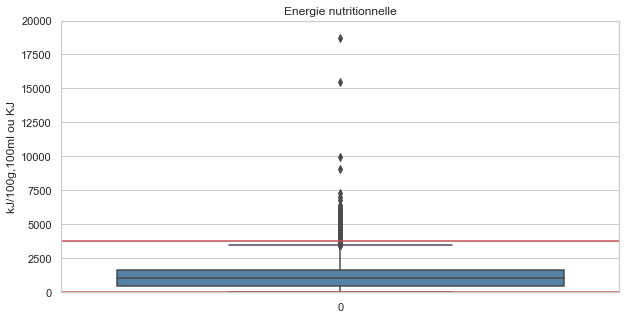

In [49]:
boite_moustache(df_appli,'energy_100g', 'Energie nutritionnelle',0, 20000,'kJ',0, 3765.6)

**Remarque** : des outliers qui dépassent 3766 kJoules pour 100g ou 100ml de produit au total.


<span style='background:Yellow'>**fat_100g**</span>

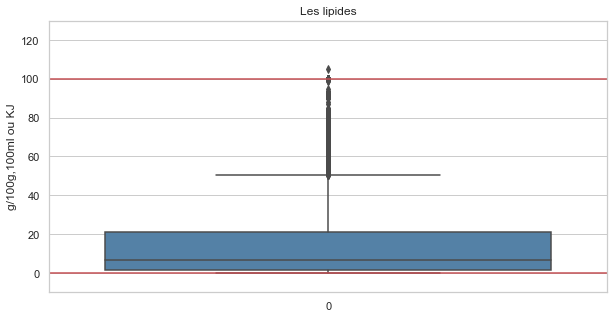

In [50]:
boite_moustache( df_appli, 'fat_100g', 'Les lipides', -10, 130, 'g', 0, 100)

**Remarque** :  des outliers qui dépassent 100g (ou 100 ml) pour 100g (ou 100ml) de produit au total.


<span style='background:Yellow'>**saturated_fat_100g**</span>

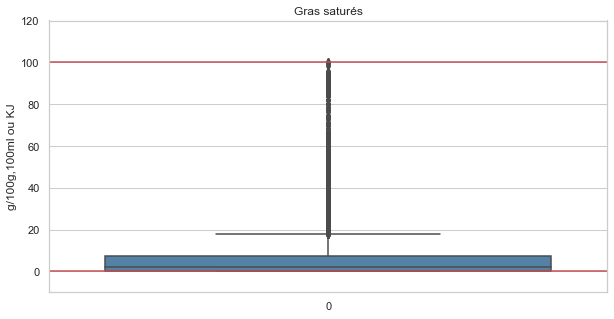

In [51]:
boite_moustache( df_appli, 'saturated-fat_100g', 'Gras saturés', -10, 120,'g', 0, 100)

**Remarque** :  des outliers qui dépassent 100g (ou 100 ml) pour 100g (ou 100ml) de produit au total.


<span style='background:Yellow'>**carbohydrates_100g**</span>

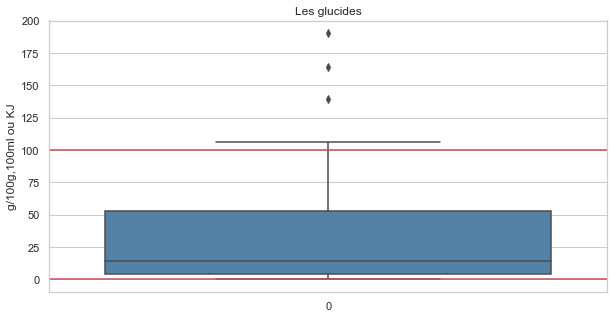

In [52]:
boite_moustache( df_appli, 'carbohydrates_100g', 'Les glucides', -10, 200,'g', 0, 100)

**Remarque** :  des outliers qui dépassent 100g (ou 100 ml) pour 100g (ou 100ml) de produit au total.


<span style='background:Yellow'>**sugars_100g**</span>

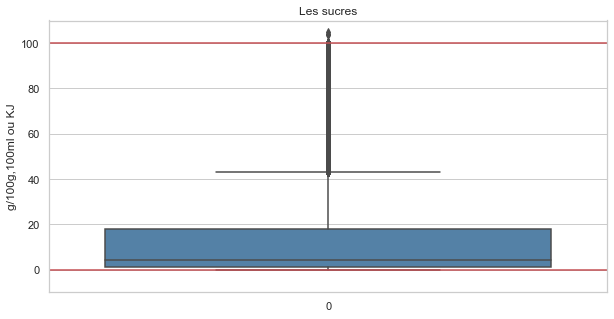

In [53]:
boite_moustache( df_appli,'sugars_100g', 'Les sucres', -10, 110, 'g', 0, 100)

**Remarque** : 
  -  des outliers qui dépassent 100g (ou 100 ml) pour 100g (ou 100ml) de produit au total.
  - des valeurs négatives impossible  .


<span style='background:Yellow'>**fiber_100g**</span>

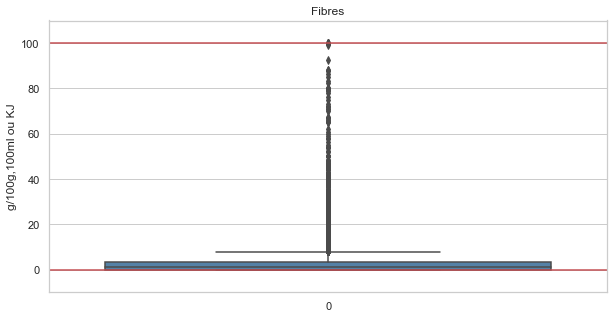

In [54]:
boite_moustache( df_appli,'fiber_100g', 'Fibres', -10, 110, 'g', 0, 100)

**Remarque** :  des outliers qui dépassent 100g (ou 100 ml) pour 100g (ou 100ml) de produit au total.


<span style='background:Yellow'>**proteins_100g**</span>

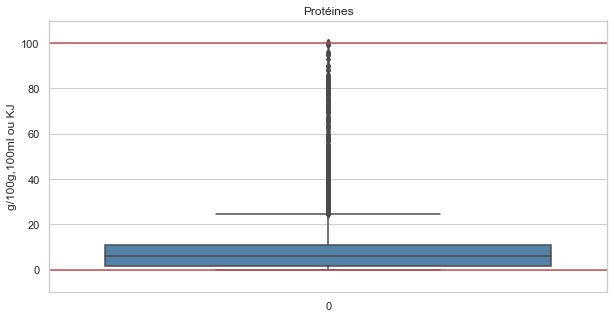

In [55]:
boite_moustache( df_appli,'proteins_100g', 'Protéines',-10, 110, 'g', 0, 100)

**Remarque** :  des outliers qui dépassent 100g (ou 100 ml) pour 100g (ou 100ml) de produit au total.


<span style='background:Yellow'>**salt_100g**</span>

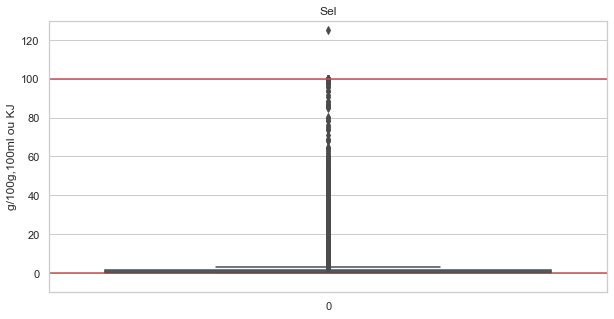

In [56]:
boite_moustache( df_appli,'salt_100g', 'Sel', -10, 130, 'g', 0, 100)

**Remarque** :  des outliers qui dépassent 100g (ou 100 ml) pour 100g (ou 100ml) de produit au total.


<span style='background:Yellow'>**sodium_100g**</span>

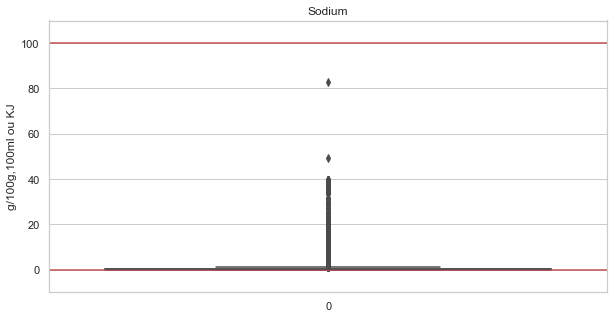

In [57]:
boite_moustache( df_appli,'sodium_100g', 'Sodium', -10, 110,'g', 0, 100)

**Remarque** : Aucune valeur aberrante.

**Note** :
***
Issu de la documentation officielle : [Calcul-Score-QR scientifique et technique_EN_271020.pdf](https://www.santepubliquefrance.fr/content/download/150263/file/QR%20scientifique%20et%20technique_EN_271020.pdf)

*'The sodium content corresponds to the salt content listed in the mandatory declaration divided by a conversion coefficient of 2.5.'* :salt=sodium multiplié par 2.5

In [58]:
# Produit avec taux de sodium*2.5 > taux de sel ?
df_appli[df_appli['sodium_100g'] > df_appli['salt_100g'] /2.5][['sodium_100g']].count().sum()

0

Pas des produits à supprimer


<span style='background:Yellow'>**additives_n**</span>

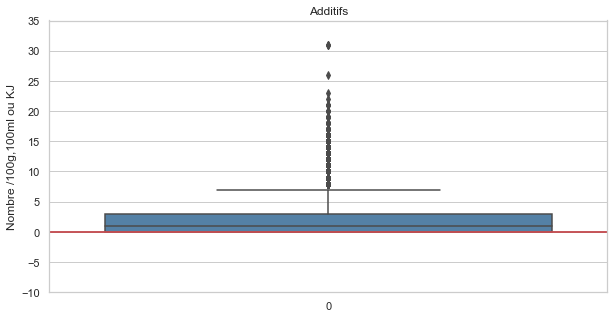

In [59]:
boite_moustache( df_appli,'additives_n', 'Additifs', -10, 35, 'Nombre ', 0, 0)

**Remarque** :  Aucune valeur aberrante.


<span style='background:Yellow'>**ingredients_from_palm_oil_n**</span>

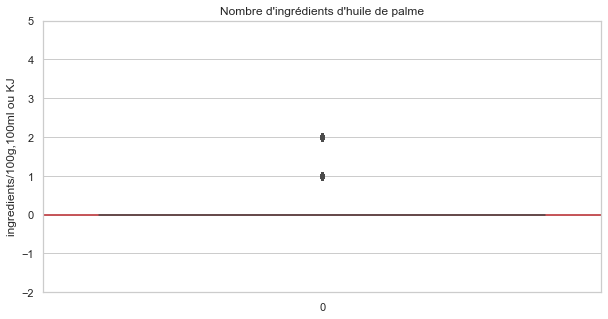

In [60]:
boite_moustache( df_appli,'ingredients_from_palm_oil_n','Nombre d\'ingrédients d\'huile de palme', -2, 5, 'ingredients', 0, 0)

**Remarque** :  Aucune valeur aberrante.


<span style='background:Yellow'>**ingredients_that_may_be_from_palm_oil_n**</span>

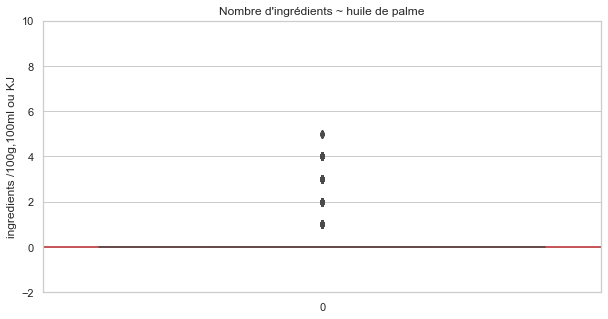

In [61]:
boite_moustache( df_appli,'ingredients_that_may_be_from_palm_oil_n',
                                  'Nombre d\'ingrédients ~ huile de palme', -2, 10, 'ingredients ', 0, 0)

**Remarque** :  Aucune valeur aberrante.


<span style='background:PaleGreen'>**BILAN - Valeurs aberrantes à corriger**</span>
- Les produits avec des valeurs >100 dans au moins l'une des colonnes [*_100g]
- Les produits avec des valeurs négatives dans au moins l'une des colonnes [*_100g]
- Les produits avec carbohydrates_100g > sugars_100g
- Les produits avec saturated-fat_100g > fat_100g
- Les produits avec la valeur 'energy_100g' anormalement élevé
- les produits dont les noms font moins de 3 caractères.

In [62]:
# Suppression des produits avec taille des noms < 3 caractères
df_appli = df_appli.drop(df_appli[df_appli['product_name'].str.len() < 3].index)

In [63]:
#  énergie pour 100g <= 3765.6 kJ
df_appli['energy_100g'] = [np.nan if val >3765.6 else val for val in df_appli['energy_100g']]

In [64]:
# valeurs des variables en '_100g' >=0 et <=100
cols_100g = df_appli.columns[df_appli.columns.str.endswith('_100g')].to_list()
cols_100g.remove('energy_100g')
for col in cols_100g:
    df_appli[col] = [np.nan if val > 100 else np.nan if val <
                     0 else val for val in df_appli[col]]

In [65]:
#  masse totale des glucides est inférieure à la masse de sucre
df_appli = df_appli.drop(df_appli[df_appli['carbohydrates_100g'] < df_appli['sugars_100g']].index)

In [66]:
# masse totale des lipides est inférieure à la masse des acides gras
df_appli['saturated-fat_100g'] = [np.nan if row[0] < row[1] else row[1]
                                  for row in zip(df_appli['fat_100g'], df_appli['saturated-fat_100g'])]


<span style='background:Yellow'>**Regrouper les variables avec nombre d'ingrédients d'huile de palme**</span>

In [67]:
# Regroupement des 2 variables avec nombre d'ingrédients d'huile de palme
df_appli['nb_ingredients_huile_palm'] = df_appli['ingredients_from_palm_oil_n'] + \
    df_appli['ingredients_that_may_be_from_palm_oil_n']
# Suppression de la variable 'ingredients_from_palm_oil_n'
df_appli.drop('ingredients_from_palm_oil_n', 1, inplace=True)
# Suppression de la variable 'ingredients_that_may_be_from_palm_oil_n'
df_appli.drop('ingredients_that_may_be_from_palm_oil_n', 1, inplace=True)


C:\Users\karim\AppData\Local\Temp/ipykernel_116672/2664766226.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_appli.drop('ingredients_from_palm_oil_n', 1, inplace=True)
C:\Users\karim\AppData\Local\Temp/ipykernel_116672/2664766226.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_appli.drop('ingredients_that_may_be_from_palm_oil_n', 1, inplace=True)



<span style='background:Yellow'>**Regrouper les variable sodium_100g et salt_100g**</span>

In [68]:
# Regroupement des valeurs non nulles de la variable sodium_100g et salt_100g (salt=sodium multiplié par 2.5)

df_appli['sel'] = [row[0] if not np.isnan(row[0]) else row[1]*2.5 if not np.isnan(
    row[1]) else np.nan for row in zip(df_appli['salt_100g'], df_appli['sodium_100g'])]
# Correction des valeurs aberrantes > 100g pour la nouvelle colonne
df_appli['sel'] = [np.nan if val > 100 else val for val in df_appli['sel']]
# Suppression de la variable 'salt_100g' 
df_appli.drop('salt_100g', 1, inplace=True)
# Suppression de la variable 'sodium_100g' 
df_appli.drop('sodium_100g', 1, inplace=True)


C:\Users\karim\AppData\Local\Temp/ipykernel_116672/302344714.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_appli.drop('salt_100g', 1, inplace=True)
C:\Users\karim\AppData\Local\Temp/ipykernel_116672/302344714.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_appli.drop('sodium_100g', 1, inplace=True)


In [69]:
df_appli.shape

(91122, 19)

### <span style='background:Red'> Les valeurs manquantes</span>

In [70]:
df_appli.columns.to_list()

['code',
 'image_url',
 'product_name',
 'pnns_groups_1',
 'pnns_groups_2',
 'main_category_fr',
 'brands',
 'additives_n',
 'nutrition_grade_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'nutrition-score-fr_100g',
 'nb_ingredients_huile_palm',
 'sel']

**Matrice de corrélation**

<AxesSubplot:>

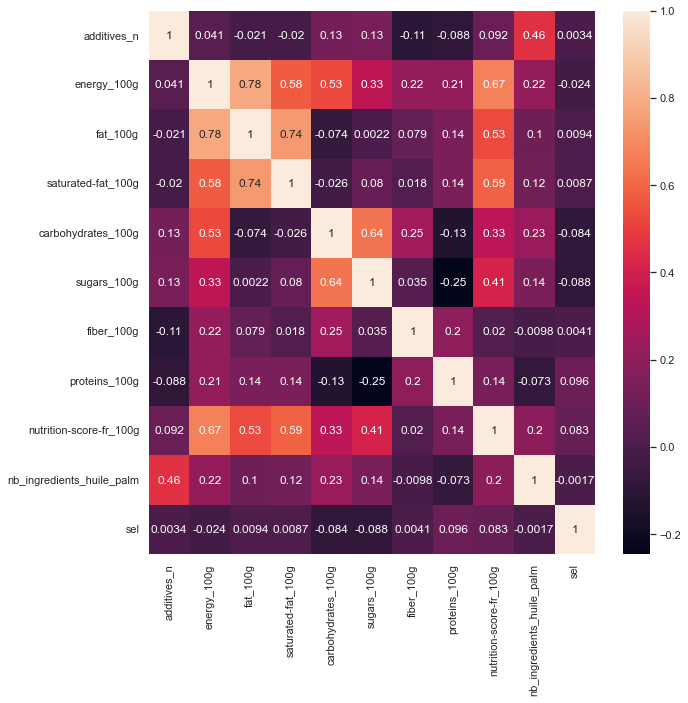

In [71]:
plt.figure(figsize = (10,10))
sns.heatmap(df_appli.corr(), annot=True)

### Imputation des valeurs manquantes 

#### Les fibres 

**Les fibres** sont peu corrélées avec les autres nutriments, si la valeur n'est pas renseignée, elle doit être soit non connue, soit nulle. Le choix est fait de remplacer les valeurs manquantes par la constante **'0'**

In [72]:
df_appli['fiber_100g'] = df_appli['fiber_100g'].fillna(0)

#### Nombre d'ingrédient d'huile de palme



Si le nombre d'ingrédients d'huile de palme n'est pas renseigné, on peut considérer soit qu'il n'est pas connu, soit qu'il n'y a pas d'huile de palme dans le produit. Le choix est fait de remplacer les valeurs manquantes par la constante **'0'**.

In [73]:
df_appli['nb_ingredients_huile_palm'] = df_appli['nb_ingredients_huile_palm'].fillna(0)

#### Nombre d'additifs


Si le nombre d'additifs n'est pas renseigné, on peut considérer soit qu'il n'est pas connu, soit qu'il n'y a pas d'additif dans le produit. Le choix est fait de remplacer les valeurs manquantes par la constante **'0'**.

In [74]:
df_appli['additives_n'] = df_appli['additives_n'].fillna(0)

###  traitements des données manquantes (hors nutriscore_score et nutriscore_grade)

Pour la complétion des autres colonnes, je choisi d'utiliser la médiane des valeurs disponible comme valeur de substitution.
Pour que ce choix d'utiliser la médiane reste cohérent, j'appliquerai la médiane à chaque produit en fonction de la catégorie à laquelle il appartient.

Pour le choix des catégories je m'appuie sur les modalités de la colonne **pnns_group_1.**



In [75]:
df_appli.pnns_groups_1.value_counts()

unknown                    11414
Sugary snacks               9336
Fish Meat Eggs              6721
Beverages                   6541
Milk and dairy products     6381
Cereals and potatoes        6101
Composite foods             6019
Fruits and vegetables       4059
Fat and sauces              3763
Salty snacks                2114
fruits-and-vegetables        546
sugary-snacks                471
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64

In [76]:
#Filtrage de 'data' avec les données de la colonne 'pnns_groups_1' Non Null ET différent de 'unknown'
df_grp_1 = df_appli[(df_appli.pnns_groups_1.notnull()) & (df_appli.pnns_groups_1 != 'unknown')]
df_grp_1

,code,image_url,product_name,pnns_groups_1,pnns_groups_2,main_category_fr,brands,additives_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,nb_ingredients_huile_palm,sel
182,5200016,http://fr.openfoodfacts.org/images/products/00...,lentilles vertes,Cereals and potatoes,Legumes,Aliments et boissons à base de végétaux,Bertrand Lejeune,0.0,nan,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
184,7730009,http://fr.openfoodfacts.org/images/products/00...,Biscuits sablés fourrage au cacao,Sugary snacks,Biscuits and cakes,Sablés,St Michel,3.0,nan,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN
188,10090206,http://fr.openfoodfacts.org/images/products/00...,Thé de Noël aromatisé orange-cannelle,Beverages,Non-sugared beverages,Thés,Alice Délice,0.0,nan,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
226,40608754,http://fr.openfoodfacts.org/images/products/00...,"Pepsi, Nouveau goût !",Beverages,Sweetened beverages,Sodas,Pepsi,2.0,E,177.0,0.0,0.0,10.4,10.4,0.0,0.0,13.0,0.0,0.0254
240,87177756,http://fr.openfoodfacts.org/images/products/00...,7Up,Beverages,Sweetened beverages,Sodas aux fruits,"7Up,Pepsico",3.0,E,177.0,0.0,0.0,10.4,10.4,0.0,0.0,13.0,0.0,0.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320749,9820111458900,http://fr.openfoodfacts.org/images/products/98...,Les Belles Tranches Bacon fumé,Fish Meat Eggs,Meat,Viandes,Justin Bridou,0.0,nan,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
320751,9847548283004,http://fr.openfoodfacts.org/images/products/98...,Tartines craquantes bio au sarrasin,Cereals and potatoes,Bread,Pains,Le Pain des fleurs,0.0,A,1643.0,2.8,0.6,74.8,2.6,5.9,13.0,NaN,0.0,0.6800
320758,9900010011557,http://fr.openfoodfacts.org/images/products/99...,Miel de Camargue,Sugary snacks,Sweets,Produits d'élevages,L. Boulaire,0.0,nan,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
320763,99111250,http://fr.openfoodfacts.org/images/products/99...,Thé vert Earl grey,Beverages,Non-sugared beverages,Thés verts,Lobodis,0.0,C,21.0,0.2,0.2,0.5,0.5,0.2,0.5,2.0,0.0,0.0254


In [77]:
# Définition des fonctions de remplissage des données manquantes

def fillMissingValues(df, cols, categ):
  '''Renseigne les valeurs manquantes des colonnes **cols** 
  du DataFrame 'df' à partir des médianes de ces colonnes.
  Les valeurs sont renseignées par catégories selon les modalités de la colonne **categ**'''

  for categorie in df[categ].unique():
    df.loc[df[categ]==categorie, cols] = df[df[categ]==categorie][cols].fillna(df[df[categ] == categorie][cols].median())
  return df

In [78]:
#Remplissage des données manquantes des colonnes [*_100g] (à l'exception de 'nutrition-score-fr_100g') à partir de
# des médianes et en fonction des modalités de la colonne 'pnns_groups_1'
columns_ = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g','proteins_100g','sel']
df_appli = fillMissingValues(df_grp_1, columns_, 'pnns_groups_1')
df_appli.head()

C:\Users\karim\anaconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,code,image_url,product_name,pnns_groups_1,pnns_groups_2,main_category_fr,brands,additives_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,nb_ingredients_huile_palm,sel
182,5200016,http://fr.openfoodfacts.org/images/products/00...,lentilles vertes,Cereals and potatoes,Legumes,Aliments et boissons à base de végétaux,Bertrand Lejeune,0.0,nan,1501.0,2.9,0.6,65.0,3.4,0.0,9.40,NaN,0.0,0.4000
184,7730009,http://fr.openfoodfacts.org/images/products/00...,Biscuits sablés fourrage au cacao,Sugary snacks,Biscuits and cakes,Sablés,St Michel,3.0,nan,1928.0,21.0,9.4,59.0,39.0,0.0,5.80,NaN,1.0,0.2400
188,10090206,http://fr.openfoodfacts.org/images/products/00...,Thé de Noël aromatisé orange-cannelle,Beverages,Non-sugared beverages,Thés,Alice Délice,0.0,nan,184.0,0.0,0.0,10.0,9.3,0.0,0.23,NaN,0.0,0.0100
226,40608754,http://fr.openfoodfacts.org/images/products/00...,"Pepsi, Nouveau goût !",Beverages,Sweetened beverages,Sodas,Pepsi,2.0,E,177.0,0.0,0.0,10.4,10.4,0.0,0.00,13.0,0.0,0.0254
240,87177756,http://fr.openfoodfacts.org/images/products/00...,7Up,Beverages,Sweetened beverages,Sodas aux fruits,"7Up,Pepsico",3.0,E,177.0,0.0,0.0,10.4,10.4,0.0,0.00,13.0,0.0,0.1000


###  traitements des données manquantes pour nutriscore_score et nutriscore_grade

- Maintenant que toutes les données nutritionelles sont complètes, on va imputer les valeurs manquantes de la colonne 'nutrition_grade_fr' (valeurs notées de A à E), en utilisant l'algorithme knn (Méthode des k plus proches voisins), ce qui permet d'imputer les valeurs d'un produit selon les produits qui lui ressemble le plus.

- Cette colonne une fois complète nous permettra de déterminer les valeurs manquantes de la colonne 'nutrition-score-fr_100g', ces 2 colonnes étant étroitement corrélées. Pour ce faire, connaissant le nutrition-grade d'un produit, si son nutrition-score est manquant, on l'imputera avec la moyenne des nutrition-score dont le nutrition-grade est le même.

In [79]:
def imputationForNutriScoreAndGrade(data, quanti, nutri_grade):
    # Avant d'imputer les valeurs manquantes de nutrition-grade (qui sont des valeurs qualitatives),
    #on encode les valeurs pour qu'elles soient numériques
    le = preprocessing.LabelEncoder()
    le.fit(data['nutrition_grade_fr'])
    data['nutrition_grade_fr'] = np.where(le.transform(data['nutrition_grade_fr']) == 5, np.nan, le.transform(data['nutrition_grade_fr']))

    data_quanti = data[quanti + nutri_grade].copy()

    # Ici on impute les valeurs manquantes pour nutrition-grade en utilisant le knn
    imputer = KNNImputer(n_neighbors=5)
    data_quanti[quanti + nutri_grade] = imputer.fit_transform(data_quanti[quanti + nutri_grade])

    data_quanti['nutrition_grade_fr'] = data_quanti['nutrition_grade_fr'].apply(math.floor)
    # On décode les valeurs de nutrition-grade pour retrouver les valeurs sous formes qualitatives (de A à E)
    data_quanti['nutrition_grade_fr'] = le.inverse_transform(data_quanti['nutrition_grade_fr'])

    data[quanti + nutri_grade] = data_quanti.copy()

    nutrition_grade_map = {}
    # On ajoute dans un dictionnaire chaque valeur du nutri-grade avec la moyenne des nutri-score associés
    for value in data['nutrition_grade_fr'].unique():
        nutrition_grade_map[value] = data['nutrition-score-fr_100g'][data['nutrition_grade_fr'] == value].mean()

    # On impute les valeurs manquantes de nutrition-score avec la moyenne coresspondant au bon nutrition-grade
    for index in data.index:
        if str(data['nutrition-score-fr_100g'][index]) == 'nan':
            data['nutrition-score-fr_100g'][index] = nutrition_grade_map[data['nutrition_grade_fr'][index]]

    return data.copy()


In [80]:
#quanti = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','sel']
nutri_score = ['nutrition-score-fr_100g']
nutri_grade = ['nutrition_grade_fr']


# Imputation des colonnes 'nutrition_grade_fr' et 'nutrition-score-fr_100g'
data_selection_clean =  imputationForNutriScoreAndGrade(df_appli, columns_, nutri_grade)
df_appli_clean= data_selection_clean

C:\Users\karim\AppData\Local\Temp/ipykernel_116672/2312110318.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nutrition-score-fr_100g'][index] = nutrition_grade_map[data['nutrition_grade_fr'][index]]


In [81]:
df_appli_clean['nutrition_grade_fr']

182       A
184       C
188       A
226       E
240       E
         ..
320749    B
320751    A
320758    C
320763    C
320765    B
Name: nutrition_grade_fr, Length: 52054, dtype: object

In [82]:
dataStatsCols = (df_appli_clean.notnull().sum()/len(df_appli_clean)).sort_values(ascending=False)
dataStatsCols

code                         1.000000
fat_100g                     1.000000
nb_ingredients_huile_palm    1.000000
nutrition-score-fr_100g      1.000000
proteins_100g                1.000000
fiber_100g                   1.000000
sugars_100g                  1.000000
carbohydrates_100g           1.000000
saturated-fat_100g           1.000000
energy_100g                  1.000000
nutrition_grade_fr           1.000000
additives_n                  1.000000
main_category_fr             1.000000
pnns_groups_2                1.000000
pnns_groups_1                1.000000
product_name                 1.000000
sel                          1.000000
brands                       0.992373
image_url                    0.743555
dtype: float64

In [83]:
df_appli_clean.shape

(52054, 19)

#### Sauvegarde du jeu de données nettoyé et imputé

In [ ]:
df_appli_clean.to_csv('openfoodfacts_clean.csv', sep='\t',index=False)

**Note** : L'analyse exploratoire de ce jeu de données nettoyé sera réalisée dans le second notebook PSanté_02_notebookanalyse.ipynb